Лабораторная работа №2 студента группы М8О-406Б-18 Кузьмичева Александра

## Данные

Данные -  https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps
Необходимо предсказать рейтинг приложения 

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv('./AppleStore.csv')
data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


Поделим фичи на числовые и категориальные


In [ ]:
num_cols = [
    'size_bytes',
    'price',
    'rating_count_tot',
    'rating_count_ver',
    'sup_devices.num',
    'ipadSc_urls.num',
    'lang.num',
    'cont_rating',
]

cat_cols = [
    'currency',
    'prime_genre'
]

target_col = 'user_rating'

cols = num_cols + cat_cols + [target_col]

In [ ]:
data = data[cols]
data['cont_rating'] = data['cont_rating'].str.slice(0, -1).astype(int)
data.head()

,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,currency,prime_genre,user_rating
0,100788224,3.99,21292,26,38,5,10,4,USD,Games,4.0
1,158578688,0.00,161065,26,37,5,23,4,USD,Productivity,4.0
2,100524032,0.00,188583,2822,37,5,3,4,USD,Weather,3.5
3,128512000,0.00,262241,649,37,5,9,12,USD,Shopping,4.0
4,92774400,0.00,985920,5320,37,5,45,4,USD,Reference,4.5


In [ ]:
data.isna().mean()

size_bytes          0.0
price               0.0
rating_count_tot    0.0
rating_count_ver    0.0
sup_devices.num     0.0
ipadSc_urls.num     0.0
lang.num            0.0
cont_rating         0.0
currency            0.0
prime_genre         0.0
user_rating         0.0
dtype: float64

In [ ]:
# распределение категориальных фичей
for col in cat_cols:
    print(f"{col} DISTRIBUTION")
    print(data[col].value_counts())
    print()

currency DISTRIBUTION
USD    7197
Name: currency, dtype: int64

prime_genre DISTRIBUTION
Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64



In [ ]:
#в колонке currency только одно значение, можно колонку убрать
data = data.drop(columns=['currency'])
cat_cols.remove('currency')

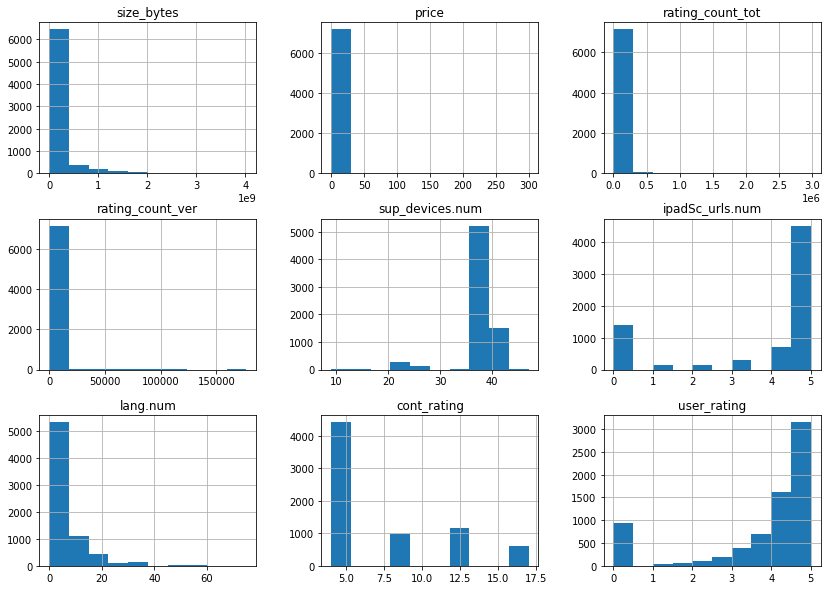

In [ ]:
#распредление величин
data.hist(column=num_cols+cat_cols+[target_col], figsize=(14, 10))
None

А теперь посмотрим на корреляции между фичами

In [ ]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,user_rating
size_bytes,1.00,0.18,0.00,0.01,-0.12,0.15,0.00,0.14,0.07
price,0.18,1.00,-0.04,-0.02,-0.12,0.07,-0.01,-0.03,0.05
rating_count_tot,0.00,-0.04,1.00,0.16,0.01,0.02,0.14,0.01,0.08
rating_count_ver,0.01,-0.02,0.16,1.00,0.04,0.02,0.01,0.00,0.07
sup_devices.num,-0.12,-0.12,0.01,0.04,1.00,-0.04,-0.04,0.02,-0.04
ipadSc_urls.num,0.15,0.07,0.02,0.02,-0.04,1.00,0.09,-0.11,0.27
lang.num,0.00,-0.01,0.14,0.01,-0.04,0.09,1.00,-0.07,0.17
cont_rating,0.14,-0.03,0.01,0.00,0.02,-0.11,-0.07,1.00,-0.10
user_rating,0.07,0.05,0.08,0.07,-0.04,0.27,0.17,-0.10,1.00


In [ ]:
# Добавим категориальную фичу, которая говорит, бесплатное приложение или нет
data['is_free'] = data['price'] == 0
cat_cols.append('is_free')
data.head()

,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,prime_genre,user_rating,is_free
0,100788224,3.99,21292,26,38,5,10,4,Games,4.0,False
1,158578688,0.00,161065,26,37,5,23,4,Productivity,4.0,True
2,100524032,0.00,188583,2822,37,5,3,4,Weather,3.5,True
3,128512000,0.00,262241,649,37,5,9,12,Shopping,4.0,True
4,92774400,0.00,985920,5320,37,5,45,4,Reference,4.5,True


#### One-hot-encoding
Самый простой способ закодировать категориальные фичи - one hot encoding. Представьте, что у нас есть категориальная фича prime_genre с возможными значениями 
> ['Games', 'Entertainment', 'Education', 'Photo & Video']

мы можем создать 4 новые бинарные фичи для каждого из столбцов

> 'Entertaiment' -> [0, 1, 0, 0]

В pandas очень удобно использовать get_dummies для one-hot-encoding

In [ ]:
a = pd.DataFrame.from_dict({'categorical': ['a', 'b', 'a', 'c']})
a

,categorical
0,a
1,b
2,a
3,c


In [ ]:
cat_cols

['prime_genre', 'is_free']

In [ ]:
# Задание: добавьте в датафрейм колонки для всех категориальных фичей и обновите список категориальных фичей

In [ ]:
# TO DO
data = pd.get_dummies(data)
data['is_free'] = data['is_free'].astype('int')

cat_cols = ['is_free']
for c in data.columns:
    if 'prime_genre' in c:
        cat_cols.append(c)

data

,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,user_rating,is_free,prime_genre_Book,prime_genre_Business,prime_genre_Catalogs,prime_genre_Education,prime_genre_Entertainment,prime_genre_Finance,prime_genre_Food & Drink,prime_genre_Games,prime_genre_Health & Fitness,prime_genre_Lifestyle,prime_genre_Medical,prime_genre_Music,prime_genre_Navigation,prime_genre_News,prime_genre_Photo & Video,prime_genre_Productivity,prime_genre_Reference,prime_genre_Shopping,prime_genre_Social Networking,prime_genre_Sports,prime_genre_Travel,prime_genre_Utilities,prime_genre_Weather
0,100788224,3.99,21292,26,38,5,10,4,4.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,158578688,0.00,161065,26,37,5,23,4,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,100524032,0.00,188583,2822,37,5,3,4,3.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,128512000,0.00,262241,649,37,5,9,12,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,92774400,0.00,985920,5320,37,5,45,4,4.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,126644224,0.00,142,75,38,5,1,4,4.5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7193,120760320,0.00,30,30,38,0,1,4,4.5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7194,111322112,1.99,15,0,37,1,1,9,4.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7195,97235968,0.00,85,32,38,0,2,12,4.5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cat_cols

['is_free',
 'prime_genre_Book',
 'prime_genre_Business',
 'prime_genre_Catalogs',
 'prime_genre_Education',
 'prime_genre_Entertainment',
 'prime_genre_Finance',
 'prime_genre_Food & Drink',
 'prime_genre_Games',
 'prime_genre_Health & Fitness',
 'prime_genre_Lifestyle',
 'prime_genre_Medical',
 'prime_genre_Music',
 'prime_genre_Navigation',
 'prime_genre_News',
 'prime_genre_Photo & Video',
 'prime_genre_Productivity',
 'prime_genre_Reference',
 'prime_genre_Shopping',
 'prime_genre_Social Networking',
 'prime_genre_Sports',
 'prime_genre_Travel',
 'prime_genre_Utilities',
 'prime_genre_Weather']

### Масштабирование признаков

Как мы говорили в лекции часто необходимо привести все признаки к одному масштабу. Для этого в sklearn есть специальный Transformer -- StandardScaler и MinMaxScaler.

StandardScaler во время .fit() для каждого признака $x_i$ считает среднее $\mu_i$ и стандартное отклонение $\sigma_i$ на обучающем датасете. Во время .transform() к каждому признаку применяется:

$$\mathbf{x_i}^{\text{new}} = \frac{\mathbf{x_i} - \mu_i}{\sigma_i}$$


MinMaxScaler во время .fit() для каждого признака $x_i$ считает минимум $x_{i, \text{min}}$ и максимум $x_{i, \text{max}}$ на обучающем датасете. Во время .transform() к каждому признаку применяется:

$$\mathbf{x_i}^{\text{new}} = \frac{\mathbf{x_i} - x_{i, \text{min}}}{x_{i, \text{max}} - x_{i, \text{min}}}$$

In [ ]:
from sklearn.preprocessing import StandardScaler

pca = StandardScaler()
pca.fit(data[num_cols + cat_cols])

# Выход pca - numpy матрица, положим ее в новую переменную со всеми фичами
X = pca.transform(data[num_cols + cat_cols])

## Разделение на train/test



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, data[target_col], test_size=0.2)

## Обучение


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

Поговорим про метрики. Метрика это, так же как и функция потерь, какая-то функция, показывающая насколько хорошо работает наша модель. Например, любой лосс можно назвать метрикой. Но не любую метрику можно назвать лоссом: лосс это именно то число, которое мы уменьшаем в процессе обучения модели + для лосса всегда верно, что чем он меньше, тем лучше. Метрики нужны как раз для того, чтобы оценивать работу алгоритма с помощью числа, которое он не учился напрямую минимизировать.

Для классификации наиболее простой метрикой будет являться точность или accuracy (доля совпавших предсказаний и настоящих классов). Она никогда не используется внутри лоссов, потому что нет эффективного алгоритма, который бы позволил ее обучать модели с такой функцией потерь.

В данном случае у нас задача регрессии, поэтому мы используем метрику MSE

In [ ]:
def print_metrics(y_preds, y):
    print(f'R^2: {r2_score(y_preds, y)}')
    print(f'MSE: {mean_squared_error(y_preds, y)}')

In [ ]:
# Используем обычную линейную регрессию, минимизирующую сумму квадратов ошибки
lr = LinearRegression()
lr.fit(X_train, y_train)

print_metrics(lr.predict(X_test), y_test)

R^2: -5.06730753368899
MSE: 2.036011130721501


In [ ]:
# Используем обычную линейную регрессию, минимизирующую сумму квадратов ошибки
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

print_metrics(knn.predict(X_test), y_test)

R^2: -0.9861127452764629
MSE: 2.03675


## Cross Validation


Получим из кроссвалидации метрики

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

In [ ]:
cross_validate(LinearRegression(), X, data[target_col], cv=5, 
               scoring={'r2_score': make_scorer(r2_score), 
                        'mean_squared_error': make_scorer(mean_squared_error)})

{'fit_time': array([0.01301312, 0.01972032, 0.01889443, 0.02027798, 0.0184741 ]),
 'score_time': array([0.01242661, 0.0029366 , 0.00287294, 0.00280309, 0.00291681]),
 'test_mean_squared_error': array([1.66639417, 1.4875399 , 1.94036265, 2.81726398, 2.93168231]),
 'test_r2_score': array([-0.83125285,  0.06624317,  0.11575732,  0.11001206,  0.07117408])}

In [ ]:
cross_validate(KNeighborsRegressor(), X, data[target_col], cv=5, 
               scoring={'r2_score': make_scorer(r2_score, ), 
                        'mean_squared_error': make_scorer(mean_squared_error)})

{'fit_time': array([0.03699374, 0.02826595, 0.03249073, 0.03205514, 0.03113937]),
 'score_time': array([0.20620894, 0.32893038, 0.26562548, 0.24568629, 0.25101924]),
 'test_mean_squared_error': array([1.43509028, 1.604125  , 2.1318763 , 2.56031967, 2.88879778]),
 'test_r2_score': array([-0.57706574, -0.00693949,  0.02848263,  0.19118207,  0.08476091])}

## GridSearchCV
А еще с помощью кросс валидации можно искать гиперпараметры.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gbr_grid_search = GridSearchCV(KNeighborsRegressor(), 
                               [{'n_neighbors': [1, 2, 3, 4, 6, 8, 10, 15]}],
                               cv=5,
                               error_score=make_scorer(mean_squared_error),
                               verbose=10)
gbr_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] n_neighbors=1 ...................................................
[CV] ...................... n_neighbors=1, score=-0.472, total=   0.1s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ...................... n_neighbors=1, score=-0.389, total=   0.3s
[CV] n_neighbors=1 ...................................................
[CV] ...................... n_neighbors=1, score=-0.283, total=   0.2s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s


[CV] ...................... n_neighbors=1, score=-0.276, total=   0.2s
[CV] n_neighbors=1 ...................................................
[CV] ...................... n_neighbors=1, score=-0.426, total=   0.1s
[CV] n_neighbors=2 ...................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s remaining:    0.0s


[CV] ...................... n_neighbors=2, score=-0.104, total=   0.2s
[CV] n_neighbors=2 ...................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.0s remaining:    0.0s


[CV] ...................... n_neighbors=2, score=-0.064, total=   0.3s
[CV] n_neighbors=2 ...................................................
[CV] ...................... n_neighbors=2, score=-0.044, total=   0.2s
[CV] n_neighbors=2 ...................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.5s remaining:    0.0s


[CV] ...................... n_neighbors=2, score=-0.053, total=   0.2s
[CV] n_neighbors=2 ...................................................
[CV] ...................... n_neighbors=2, score=-0.089, total=   0.2s
[CV] n_neighbors=3 ...................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.7s remaining:    0.0s


[CV] ....................... n_neighbors=3, score=0.027, total=   0.2s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.015, total=   0.3s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.075, total=   0.2s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.058, total=   0.2s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.054, total=   0.2s
[CV] n_neighbors=4 ...................................................
[CV] ....................... n_neighbors=4, score=0.110, total=   0.2s
[CV] n_neighbors=4 ...................................................
[CV] ....................... n_neighbors=4, score=0.085, total=   0.3s
[CV] n_neighbors=4 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    8.5s finished


GridSearchCV(cv=5, error_score=make_scorer(mean_squared_error),
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 6, 8, 10, 15]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)

In [ ]:
print(gbr_grid_search.best_params_)
print(gbr_grid_search.best_score_)
print(gbr_grid_search.best_estimator_)

{'n_neighbors': 15}
0.17017965335588295
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='uniform')


In [ ]:
# Задание: Обучите несколько других моделей и получите лучшие скоры

In [ ]:
# TO DO

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

search = {'max_depth': np.arange(5, 150, 5), 'max_features': ['auto', 'sqrt'],
        'min_samples_leaf': np.arange(2, 20, 1), 'min_samples_split': np.arange(2, 20, 1)}

randomsearch = RandomizedSearchCV(RandomForestRegressor(), search, cv=3,
                               error_score=make_scorer(mean_squared_error),
                               verbose=10, n_iter=20)

randomsearch.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] min_samples_split=16, min_samples_leaf=10, max_features=auto, max_depth=55 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_samples_split=16, min_samples_leaf=10, max_features=auto, max_depth=55, score=0.824, total=   1.3s
[CV] min_samples_split=16, min_samples_leaf=10, max_features=auto, max_depth=55 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  min_samples_split=16, min_samples_leaf=10, max_features=auto, max_depth=55, score=0.831, total=   1.3s
[CV] min_samples_split=16, min_samples_leaf=10, max_features=auto, max_depth=55 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


[CV]  min_samples_split=16, min_samples_leaf=10, max_features=auto, max_depth=55, score=0.833, total=   1.2s
[CV] min_samples_split=7, min_samples_leaf=18, max_features=auto, max_depth=110 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.8s remaining:    0.0s


[CV]  min_samples_split=7, min_samples_leaf=18, max_features=auto, max_depth=110, score=0.826, total=   1.1s
[CV] min_samples_split=7, min_samples_leaf=18, max_features=auto, max_depth=110 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.9s remaining:    0.0s


[CV]  min_samples_split=7, min_samples_leaf=18, max_features=auto, max_depth=110, score=0.834, total=   1.1s
[CV] min_samples_split=7, min_samples_leaf=18, max_features=auto, max_depth=110 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.9s remaining:    0.0s


[CV]  min_samples_split=7, min_samples_leaf=18, max_features=auto, max_depth=110, score=0.833, total=   1.1s
[CV] min_samples_split=16, min_samples_leaf=5, max_features=sqrt, max_depth=85 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.0s remaining:    0.0s


[CV]  min_samples_split=16, min_samples_leaf=5, max_features=sqrt, max_depth=85, score=0.811, total=   0.4s
[CV] min_samples_split=16, min_samples_leaf=5, max_features=sqrt, max_depth=85 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    7.4s remaining:    0.0s


[CV]  min_samples_split=16, min_samples_leaf=5, max_features=sqrt, max_depth=85, score=0.818, total=   0.4s
[CV] min_samples_split=16, min_samples_leaf=5, max_features=sqrt, max_depth=85 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    7.8s remaining:    0.0s


[CV]  min_samples_split=16, min_samples_leaf=5, max_features=sqrt, max_depth=85, score=0.822, total=   0.4s
[CV] min_samples_split=15, min_samples_leaf=18, max_features=sqrt, max_depth=45 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    8.2s remaining:    0.0s


[CV]  min_samples_split=15, min_samples_leaf=18, max_features=sqrt, max_depth=45, score=0.774, total=   0.4s
[CV] min_samples_split=15, min_samples_leaf=18, max_features=sqrt, max_depth=45 
[CV]  min_samples_split=15, min_samples_leaf=18, max_features=sqrt, max_depth=45, score=0.785, total=   0.3s
[CV] min_samples_split=15, min_samples_leaf=18, max_features=sqrt, max_depth=45 
[CV]  min_samples_split=15, min_samples_leaf=18, max_features=sqrt, max_depth=45, score=0.797, total=   0.3s
[CV] min_samples_split=9, min_samples_leaf=14, max_features=auto, max_depth=145 
[CV]  min_samples_split=9, min_samples_leaf=14, max_features=auto, max_depth=145, score=0.826, total=   1.1s
[CV] min_samples_split=9, min_samples_leaf=14, max_features=auto, max_depth=145 
[CV]  min_samples_split=9, min_samples_leaf=14, max_features=auto, max_depth=145, score=0.833, total=   1.1s
[CV] min_samples_split=9, min_samples_leaf=14, max_features=auto, max_depth=145 
[CV]  min_samples_split=9, min_samples_leaf=14, ma

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   46.6s finished


RandomizedSearchCV(cv=3, error_score=make_scorer(mean_squared_error),
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10...
 

In [ ]:
print(randomsearch.best_params_)
print(randomsearch.best_score_)
print(randomsearch.best_estimator_)

{'min_samples_split': 12, 'min_samples_leaf': 17, 'max_features': 'auto', 'max_depth': 85}
0.8312699140688936
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=85, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=17,
                      min_samples_split=12, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [ ]:
from sklearn.svm import SVR

search = {"C": np.arange(1, 10, 0.5),
             "gamma": ['scale', 'auto'],
             'kernel': ['linear', 'rbf', 'sigmoid']}

randomsearch = RandomizedSearchCV(SVR(), search, cv=3, 
                            error_score=make_scorer(mean_squared_error), 
                            verbose=10, n_iter=10)
randomsearch.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] kernel=rbf, gamma=scale, C=5.0 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... kernel=rbf, gamma=scale, C=5.0, score=0.096, total=   2.2s
[CV] kernel=rbf, gamma=scale, C=5.0 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV] ...... kernel=rbf, gamma=scale, C=5.0, score=0.084, total=   2.1s
[CV] kernel=rbf, gamma=scale, C=5.0 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.2s remaining:    0.0s


[CV] ...... kernel=rbf, gamma=scale, C=5.0, score=0.104, total=   2.1s
[CV] kernel=sigmoid, gamma=scale, C=9.5 ..............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.3s remaining:    0.0s


[CV]  kernel=sigmoid, gamma=scale, C=9.5, score=-1358.463, total=   2.4s
[CV] kernel=sigmoid, gamma=scale, C=9.5 ..............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    8.7s remaining:    0.0s


[CV]  kernel=sigmoid, gamma=scale, C=9.5, score=-1446.082, total=   2.5s
[CV] kernel=sigmoid, gamma=scale, C=9.5 ..............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.2s remaining:    0.0s


[CV]  kernel=sigmoid, gamma=scale, C=9.5, score=-540.130, total=   2.4s
[CV] kernel=rbf, gamma=auto, C=2.5 ...................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   13.6s remaining:    0.0s


[CV] ....... kernel=rbf, gamma=auto, C=2.5, score=0.095, total=   2.0s
[CV] kernel=rbf, gamma=auto, C=2.5 ...................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   15.6s remaining:    0.0s


[CV] ....... kernel=rbf, gamma=auto, C=2.5, score=0.071, total=   2.0s
[CV] kernel=rbf, gamma=auto, C=2.5 ...................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   17.6s remaining:    0.0s


[CV] ....... kernel=rbf, gamma=auto, C=2.5, score=0.101, total=   2.0s
[CV] kernel=linear, gamma=scale, C=5.5 ...............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   19.6s remaining:    0.0s


[CV] ... kernel=linear, gamma=scale, C=5.5, score=0.023, total=   9.8s
[CV] kernel=linear, gamma=scale, C=5.5 ...............................
[CV] .. kernel=linear, gamma=scale, C=5.5, score=-0.039, total=  10.8s
[CV] kernel=linear, gamma=scale, C=5.5 ...............................
[CV] .. kernel=linear, gamma=scale, C=5.5, score=-0.009, total=  10.1s
[CV] kernel=linear, gamma=auto, C=7.0 ................................
[CV] .... kernel=linear, gamma=auto, C=7.0, score=0.023, total=  12.1s
[CV] kernel=linear, gamma=auto, C=7.0 ................................
[CV] ... kernel=linear, gamma=auto, C=7.0, score=-0.039, total=  12.9s
[CV] kernel=linear, gamma=auto, C=7.0 ................................
[CV] ... kernel=linear, gamma=auto, C=7.0, score=-0.009, total=  14.1s
[CV] kernel=sigmoid, gamma=auto, C=8.0 ...............................
[CV]  kernel=sigmoid, gamma=auto, C=8.0, score=-888.218, total=   2.3s
[CV] kernel=sigmoid, gamma=auto, C=8.0 ...............................
[CV]  

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.7min finished


RandomizedSearchCV(cv=3, error_score=make_scorer(mean_squared_error),
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ,
       7.5, 8. , 8.5, 9. , 9.5]),
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf', 'sigmoid']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=10)

In [ ]:
print(randomsearch.best_params_)
print(randomsearch.best_score_)
print(randomsearch.best_estimator_)

{'kernel': 'rbf', 'gamma': 'scale', 'C': 5.0}
0.09434455530741352
SVR(C=5.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [ ]:
from sklearn.linear_model import RidgeCV

clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 10], cv=5, scoring=make_scorer(mean_squared_error)).fit(X_train, y_train)
clf.score(X_train, y_train)

0.13742167336791578

In [ ]:
from sklearn.linear_model import LassoCV

clf = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1, 10], cv=5).fit(X_train, y_train)
clf.score(X_train, y_train)

0.1364096051815875

In [ ]:
from sklearn.tree import DecisionTreeRegressor

search = {'max_depth': np.arange(5, 150, 5), 'max_features': ['auto', 'sqrt'],
        'min_samples_leaf': np.arange(2, 20, 1), 'min_samples_split': np.arange(2, 20, 1)}

randomsearch = RandomizedSearchCV(DecisionTreeRegressor(), search, cv=3,
                               error_score=make_scorer(mean_squared_error),
                               verbose=10, n_iter=20)

randomsearch.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] min_samples_split=12, min_samples_leaf=8, max_features=sqrt, max_depth=140 
[CV]  min_samples_split=12, min_samples_leaf=8, max_features=sqrt, max_depth=140, score=0.597, total=   0.0s
[CV] min_samples_split=12, min_samples_leaf=8, max_features=sqrt, max_depth=140 
[CV]  min_samples_split=12, min_samples_leaf=8, max_features=sqrt, max_depth=140, score=0.759, total=   0.0s
[CV] min_samples_split=12, min_samples_leaf=8, max_features=sqrt, max_depth=140 
[CV]  min_samples_split=12, min_samples_leaf=8, max_features=sqrt, max_depth=140, score=0.798, total=   0.0s
[CV] min_samples_split=11, min_samples_leaf=2, max_features=auto, max_depth=130 
[CV]  min_samples_split=11, min_samples_leaf=2, max_features=auto, max_depth=130, score=0.721, total=   0.0s
[CV] min_samples_split=11, min_samples_leaf=2, max_features=auto, max_depth=130 
[CV]  min_samples_split=11, min_samples_leaf=2, max_features=auto, max_depth=130, score=0.746, tot

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s


[CV]  min_samples_split=16, min_samples_leaf=18, max_features=sqrt, max_depth=120, score=0.651, total=   0.0s
[CV] min_samples_split=16, min_samples_leaf=18, max_features=sqrt, max_depth=120 
[CV]  min_samples_split=16, min_samples_leaf=18, max_features=sqrt, max_depth=120, score=0.819, total=   0.0s
[CV] min_samples_split=10, min_samples_leaf=8, max_features=sqrt, max_depth=85 
[CV]  min_samples_split=10, min_samples_leaf=8, max_features=sqrt, max_depth=85, score=0.666, total=   0.0s
[CV] min_samples_split=10, min_samples_leaf=8, max_features=sqrt, max_depth=85 
[CV]  min_samples_split=10, min_samples_leaf=8, max_features=sqrt, max_depth=85, score=0.747, total=   0.0s
[CV] min_samples_split=10, min_samples_leaf=8, max_features=sqrt, max_depth=85 
[CV]  min_samples_split=10, min_samples_leaf=8, max_features=sqrt, max_depth=85, score=0.744, total=   0.0s
[CV] min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=80 
[CV]  min_samples_split=3, min_samples_leaf=4, max_feat

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.9s finished


RandomizedSearchCV(cv=3, error_score=make_scorer(mean_squared_error),
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='...
 

In [ ]:
print(randomsearch.best_params_)
print(randomsearch.best_score_)
print(randomsearch.best_estimator_)

{'min_samples_split': 8, 'min_samples_leaf': 16, 'max_features': 'auto', 'max_depth': 130}
0.8035038093550894
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=130,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=16, min_samples_split=8,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
